# Customer Segment Analysis

The Product Manager who is responsible for the user experience of the Everything Plus online store requests you to analyze the data that will be used to create special offers for customers. According to the product manager, research conducted qualitatively is not enough to make decisions, they need arguments based on data. This is new research. The product manager also asked to describe how your solution might work.

The data includes the customer's transaction history and all periods included in the data source will be used for analysis. The results of this analysis will be used by the product manager to make special offers for customers.

<b>Objektive:</b>
- User segmentation based on customer transaction history.

<b>Stages:</b><a id='back'></a>

1. [Data Overview](#Start)
2. [Data Pre-processing](#Pre-processing)
    - [Column name](#1)
    - [Duplicate values](#2)
    - [Missing Values](#3)
    - [Data type](#4)
    - [Column check](#5)
    - [Outliers check](#6)
    - [Additional column](#7)
3. [*Exploratory Data Analysis*](#EDA)
    - [Store metrics](#3_1)
    - [User segment](#3_2)
4. [Hypothesis Test](#Test)
    - [Statistics difference in cluster 0 and 2 order size](#h1)
5. [General Conclusion](#Conclusion)
6. [Presentation](#Presentation)
7. [Dashboard](#Dashboard)

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Dataset separators and scalers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Unsupervised Machine Learning Algorithm
from sklearn.cluster import KMeans

## Data Overview<a id='Start'></a>

In [2]:
# Load datasets
df = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\Final Project\\Part_4_Submission\\ecommerce_dataset_us.csv', sep='\t')

In [3]:
# Dataset general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [4]:
# Dataset size
df.shape

(541909, 7)

In [5]:
# Sample data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [6]:
# Checking for duplicate values
df.duplicated().sum()

5268

In [7]:
# Checking for missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

Documentation:
- `InvoiceNo` — order identifier

- `StockCode` — item identifier

- `Description` — item name

- `Quantity` — order quantity

- `InvoiceDate` — order date

- `UnitPrice` — price per item

- `CustomerID` — customer id

**Tentatives conclusions**

There are several things that can be improved on the dataset:
1. Column names can be changed to *snake case*,
2. Duplicate values,
3. Missing values in the `CustomerID`, and `Description` columns,
4. Type the data in the `InvoiceDate` and `CustomerID` columns

[Back to stages](#back)

## Data Pre-processing<a id='Pre-processing'></a>

### Column name<a id='1'></a>

In [8]:
# Column names in the dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID'],
      dtype='object')

In [9]:
# Rename the column
df = df.rename(columns={
    'InvoiceNo':'invoice_no',
    'StockCode':'stock_code',
    'Description':'description',
    'Quantity':'quantity',
    'InvoiceDate':'invoice_date',
    'UnitPrice':'unit_price',
    'CustomerID':'customer_id'
})

In [10]:
# Checking the result
df.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id'],
      dtype='object')

Column names have been successfully fixed.

[Back to stages](#back)

### Duplicate values<a id='2'></a>

In [11]:
# Checking for duplicate values
df.duplicated().sum()

5268

In [12]:
# Percentage of duplicate values compared to the entire dataset
(df.duplicated().sum()/len(df))*100

0.9721189350979592

Because the percentage is relatively small, duplicate values ​​can be removed.

In [13]:
# Removing duplicate values
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
# Checking the result
df.duplicated().sum()

0

In [15]:
# Check the percentage change
100 - ((df.shape[0]/541909)*100)

0.9721189350979529

Duplicate values ​​have been successfully fixed.

[Back to stages](#back)

### Missing Values<a id='3'></a>

In [16]:
# Checking for missing values
df.loc[df['customer_id'].isna()]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
605,536414,22139,NaN,56,11/29/2018 11:52,0.00,NaN
1407,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,11/29/2018 14:32,2.51,NaN
1408,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,11/29/2018 14:32,2.51,NaN
1409,536544,21786,POLKADOT RAIN HAT,4,11/29/2018 14:32,0.85,NaN
1410,536544,21787,RAIN PONCHO RETROSPOT,2,11/29/2018 14:32,1.66,NaN
...,...,...,...,...,...,...,...
536275,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/07/2019 10:26,4.13,NaN
536276,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/07/2019 10:26,4.13,NaN
536277,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/07/2019 10:26,4.96,NaN
536278,581498,85174,S/4 CACTI CANDLES,1,12/07/2019 10:26,10.79,NaN


In [17]:
# Percentage of missing values compared to the entire dataset
(df.isna().sum())/len(df)*100

invoice_no       0.000000
stock_code       0.000000
description      0.270945
quantity         0.000000
invoice_date     0.000000
unit_price       0.000000
customer_id     25.163377
dtype: float64

In [18]:
# Checks the relationship of missing values in both columns
check_miss = df.loc[ (df['customer_id'].isna()) & (df['description'].isna())]

In [19]:
# Checking the result
check_miss.head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
605,536414,22139,NaN,56,11/29/2018 11:52,0.0,NaN
1934,536545,21134,NaN,1,11/29/2018 14:32,0.0,NaN
1935,536546,22145,NaN,1,11/29/2018 14:33,0.0,NaN
1936,536547,37509,NaN,1,11/29/2018 14:33,0.0,NaN
1951,536549,85226A,NaN,1,11/29/2018 14:34,0.0,NaN
1952,536550,85044,NaN,1,11/29/2018 14:34,0.0,NaN
1984,536552,20950,NaN,1,11/29/2018 14:34,0.0,NaN
1985,536553,37461,NaN,3,11/29/2018 14:35,0.0,NaN
1986,536554,84670,NaN,23,11/29/2018 14:35,0.0,NaN
2362,536589,21777,NaN,-10,11/29/2018 16:50,0.0,NaN


In [20]:
# Percentage versus dataset
(check_miss.shape[0]/len(df))*100

0.2709446352403189

In [21]:
# Examine the distribution of missing values in the `unit_price` column
check_miss['unit_price'].value_counts()

0.0    1454
Name: unit_price, dtype: int64

In [22]:
# Distribution of `unit_price` values in the dataset
df['unit_price'].value_counts()

1.25      49750
1.65      37627
0.85      28182
2.95      27350
0.42      24277
          ...  
46.86         1
28.66         1
156.45        1
11.00         1
224.69        1
Name: unit_price, Length: 1630, dtype: int64

1. From the data above, when the `customer_id` and `description` columns have missing values, the `unit_price` column values ​​only have a value of 0.
2. And when viewed from the percentage compared to the dataset, all missing values ​​in the `description` column also have missing values ​​in the `customer_id` column, but not vice versa.

Since this column will not be of much help in terms of customer segmentation, there is no further information to fill in the missing values ​​and the percentages are quite small, the rows where the `description` and `customer_id` columns have missing values ​​will be deleted.

In [23]:
# Delete the values
df = df.loc[ ~((df['customer_id'].isna()) & (df['description'].isna()))]

In [24]:
# Checking the result
((df.isna().sum())/len(df))*100

invoice_no       0.000000
stock_code       0.000000
description      0.000000
quantity         0.000000
invoice_date     0.000000
unit_price       0.000000
customer_id     24.960061
dtype: float64

The remaining `customer_id` column which has missing values ​​will be filled using the mode from the `customer_id` column, the number is still quite a lot.

In [25]:
# Function to fill in missing values
'''
Definition:
-----------
    This function is to fill in missing values based on conditions from other columns
-----------
    data:
        desired data
    agg_columns:
        The condition of other columns to be compared
    value_columns:
        column to fill in (contains missing values)
    buttons:
        1 means the missing values are filled with the median
        2 means the missing values are filled in with the mean
        3 means the missing values are filled with mode/mode
'''
def fill_missing_value(data, agg_column, value_column, button=1):
    
    # Button to change the mean/median
    if button == 1:
        grouped_values = data.groupby(agg_column)[value_column].median().reset_index()
    elif button == 2:
        grouped_values = data.groupby(agg_column)[value_column].mean().reset_index()
    else:
        grouped_values = data.groupby(agg_column)[value_column].apply(pd.Series.mode).reset_index()
    
    # Number of rows in the grouped column
    size = len(grouped_values)
    
    # Insert missing values into the dataset
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        data.loc[ (data[agg_column]==group) & (data[value_column].isna()), value_column ] = value
    return data

In [26]:
# Executes the function
fill_missing_value(data = df, agg_column = 'stock_code', value_column = 'customer_id', button=3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0


In [27]:
# Checking for missing values
((df.isna().sum())/len(df))*100

invoice_no      0.000000
stock_code      0.000000
description     0.000000
quantity        0.000000
invoice_date    0.000000
unit_price      0.000000
customer_id     0.535327
dtype: float64

For the remaining missing values, the percentage is small, and there is no information that can help fill in the missing values, so the missing values ​​can be deleted.

In [28]:
# Delete rows containing missing values
df.dropna(inplace=True)

In [29]:
# Checking for missing values
df.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
dtype: int64

All missing values ​​have been successfully fixed.

In [30]:
# Check the percentage change
100 - ((df.shape[0]/541909)*100)

1.7691162169294046

[Back to stages](#back)

### Data type<a id='4'></a>

#### `invoice_date`

In [31]:
# The values of the `invoice_date` column
df['invoice_date']

0         11/29/2018 08:26
1         11/29/2018 08:26
2         11/29/2018 08:26
3         11/29/2018 08:26
4         11/29/2018 08:26
                ...       
536636    12/07/2019 12:50
536637    12/07/2019 12:50
536638    12/07/2019 12:50
536639    12/07/2019 12:50
536640    12/07/2019 12:50
Name: invoice_date, Length: 532322, dtype: object

In [32]:
# Change the data type
df['invoice_date'] = df['invoice_date'].astype('datetime64')

In [33]:
# Checking the result
df.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id            float64
dtype: object

Data type successfully changed.

#### `customer_id`

In [34]:
# Checks the values of the `customer_id` column
df['customer_id'].value_counts()

17841.0    31390
14096.0    22296
14911.0    18479
12748.0    10787
14606.0     8434
           ...  
16144.0        1
15118.0        1
14090.0        1
15313.0        1
17715.0        1
Name: customer_id, Length: 4372, dtype: int64

In [35]:
# Fixed the data type
df['customer_id'] = df['customer_id'].astype('int')
df['customer_id'] = df['customer_id'].astype('str')

In [36]:
# Checking the values
df['customer_id'].value_counts()

17841    31390
14096    22296
14911    18479
12748    10787
14606     8434
         ...  
16144        1
15118        1
14090        1
15313        1
17715        1
Name: customer_id, Length: 4372, dtype: int64

Data type successfully changed.

[Back to stages](#back)

### Column check<a id='5'></a>

#### `invoice_no`

In [37]:
# Check the values of the `invoice_no` column
df.invoice_no.sample(10)

230008    557292
436082    574481
32544     539215
79535     543033
293533    562843
5738      536876
262334    560097
90895     544143
16827     537680
755       536460
Name: invoice_no, dtype: object

this column is already good.

#### `stock_code`

In [38]:
# Checking the values of the `stock_code` column
df.stock_code.sample(10)

249319     23204
227921     22382
381398     23306
525364     22727
334970     23139
450059     22492
47256      20856
183179    84673B
49226      22386
3856       22083
Name: stock_code, dtype: object

In [39]:
# Checking the 'POST' value on the dataset
((len(df.loc[(df.stock_code=='POST')]))/len(df))*100

0.2351959903967899

Since shipping costs are not included in the customer segmentation analysis and also a very small percentage, the `stock_code` column with the value "POST"-postage will be removed.

In [40]:
# Delete the 'POST' value in the `stock_code` field
df = df.loc[~(df.stock_code=='POST')]

In [41]:
# Checking the 'M' value on the dataset
((len(df.loc[(df.stock_code=='M')]))/len(df))*100

0.10657728736324777

For the same reason, the `stock_code` field with a manual "M"-value was removed.

In [42]:
# Delete the 'M' value in the `stock_code` column
df = df.loc[~(df.stock_code=='M')]

Correction was successfully performed for all values ​​from this column.

#### `description`

In [43]:
# Checks the values of the `description` field
df.description.sample(10)

503424                   PETIT TRAY CHIC
287710               SAVE THE PLANET MUG
140043      GUMBALL MONOCHROME COAT RACK
43498        GREETING CARD, TWO SISTERS.
405725           EGG CUP MILKMAID HELGA 
235718            6 RIBBONS RUSTIC CHARM
536276    JUMBO  BAG BAROQUE BLACK WHITE
255120       BIG DOUGHNUT FRIDGE MAGNETS
434530    HOME SWEET HOME CUSHION COVER 
398868      SMALL MARSHMALLOWS PINK BOWL
Name: description, dtype: object

In [44]:
# Change the values of this column to lowercase
df.description = df.description.str.lower()

In [45]:
# Checking the result
df.description.head()

0     white hanging heart t-light holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4         red woolly hottie white heart.
Name: description, dtype: object

In [46]:
# Checking data distribution
df.groupby('description').agg('nunique').sort_values(by='quantity', ascending=False).head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id
description,,,,,,
check,162,149,109,140,1,72
charlotte bag suki design,894,1,98,886,8,249
popcorn holder,839,1,88,828,5,296
red retrospot charlotte bag,1050,1,86,1044,9,335
rabbit night light,1009,1,80,997,6,450
paper chain kit 50's christmas,1170,1,72,1159,7,615
woodland charlotte bag,843,1,71,841,8,238
party bunting,1706,1,69,1694,16,708
regency cakestand 3 tier,2169,1,68,2151,10,887


There are several values ​​from this column that can be changed to make grouping easier.

In [47]:
# Examine datasets
df.loc[df.description.str.contains('damages|damaged', regex=True), 'description'].unique()

array(['samples/damages', 'damages', 'damages/display', 'damaged stock',
       'damages?', 'damaged', 'possible damages or lost?',
       'damages/showroom etc', 'damages/credits from asos.',
       'damages/dotcom?', 'wet damaged', 'water damaged',
       'damages/samples', 'damages wax', '????damages????'], dtype=object)

In [48]:
# Change the values
df.loc[df.description.str.contains('damages|damaged', regex=True), 'description'] = 'damaged'

In [49]:
# Examine datasets
df.loc[df.description.str.contains('\?', regex=True), 'description'].unique()

array(['?', '? sold as sets?', '?sold as sets?', '?lost', 'sold in set?',
       'wrong code?', 'code mix up? 84930', '?display?', '?missing', '??',
       'historic computer difference?....se', 'missing?', '???lost',
       'check?', '?? missing', '????missing', '???missing', 'wet?',
       'lost??', '???'], dtype=object)

In [50]:
# Change the values
df.loc[df.description.str.contains('\?', regex=True), 'description'] = 'missing'

In [51]:
# Examine datasets
df.loc[df.description.str.contains('check', regex=True), 'description'].unique()

array(['brown check cat doorstop ', 'pair padded hangers pink check',
       'sunset check hammock', 'check', 'blue crusoe check lampshade',
       'blue check bag w handle 34x20cm', 'stock check'], dtype=object)

In [52]:
# Change the values
df.loc[df.description.str.contains('brown check cat doorstop ', regex=True), 'description'] = 'brown cat doorstop'
df.loc[df.description.str.contains('pair padded hangers pink check', regex=True), 'description'] = 'pair padded hangers pink'
df.loc[df.description.str.contains('sunset check hammock', regex=True), 'description'] = 'sunset hammock'
df.loc[df.description.str.contains('blue crusoe check lampshade', regex=True), 'description'] = 'blue crusoe lampshade'
df.loc[df.description.str.contains('blue check bag w handle 34x20cm', regex=True), 'description'] = 'blue bag w handle 34x20cm'

In [53]:
# Change the values
df.loc[df.description.str.contains('check', regex=True), 'description'] = 'check'

In [54]:
# Dataset size
len(df.loc[df.description.str.contains('check|damaged|missing|found', regex=True), 'description'])

402

because only 402 lines have the descriptions 'check', 'damaged', 'missing', and 'found' where the lines using these descriptions are not very helpful in the segment analysis process, they can be deleted.

In [55]:
# Deleting datasets
df = df.loc[~(df.description.str.contains('check|demaged|missing|found', regex=True))]

In [56]:
# Removing whitespace in the `description` column
df['description'] = df['description'].str.strip()

In [57]:
# Checking data distribution
df.groupby('description').agg('nunique').sort_values(by='quantity', ascending=False).tail(20)

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id
description,,,,,,
for online retail orders,1,1,1,1,1,1
cake stand lace white,1,1,1,1,1,1
pink cherry blossom cup & saucer,1,1,1,1,1,1
"food cover with beads , set 2 sizes",1,1,1,1,1,1
"cakestand, 3 tier, loveheart",1,1,1,1,1,1
came coded as 20713,1,1,1,1,1,1
miniture antique rose hook ivory,4,1,1,4,1,4
can't find,1,1,1,1,1,1
pink boudoir t-light holder,1,1,1,1,1,1


This column was successfully repaired.

#### `quantity`

In [58]:
# Sample data of the `quantity` column
df.quantity.sample(10)

112341     2
377605     3
453246     6
12322     12
441318     1
216616    12
428978     2
373224     6
308262     6
321563     2
Name: quantity, dtype: int64

There are negative values ​​in this column where all values ​​in this column should be positive.

In [59]:
# Change the value to positive
df.quantity = abs(df.quantity)

In [60]:
# Checking the result
df.loc[df.quantity<0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id


Nilai negatif sudah diperbaiki.

#### `invoice_date`

In [61]:
# Check `invoice_date` column
df.invoice_date.sample(10)

188126   2019-05-11 15:53:00
276352   2019-07-23 17:09:00
46223    2019-01-04 15:25:00
141337   2019-03-30 11:50:00
271456   2019-07-19 12:33:00
471376   2019-11-15 09:49:00
136903   2019-03-27 15:20:00
132347   2019-03-23 12:00:00
241733   2019-06-27 15:58:00
123418   2019-03-16 12:26:00
Name: invoice_date, dtype: datetime64[ns]

Everything looks good.

#### `unit_price`

In [62]:
# Sample data of `unit_price` column
df.unit_price.sample(10)

27801     1.25
326745    1.63
352797    2.08
422812    0.83
36764     1.66
172349    0.83
403162    0.39
202829    2.08
278451    9.95
271093    2.95
Name: unit_price, dtype: float64

In [63]:
# Checks for possible negative values
df.loc[df.unit_price<0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id


Everything looks good.

#### `customer_id`

In [64]:
# Sample data of `customer_id` column
df.customer_id.sample(10)

103600    14056
221559    16938
447139    17920
477009    17841
255581    18024
400223    17073
397872    14911
317408    12490
10644     18118
370842    14653
Name: customer_id, dtype: object

Everything looks great.

[Back to stages](#back)

### Outliers check<a id='6'></a>

In [65]:
# Description of the dataset
df.describe()

,quantity,unit_price
count,530226.000000,530226.000000
mean,11.238378,3.711154
std,219.501587,18.070051
min,1.000000,0.000000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,12.000000,4.130000
max,80995.000000,4505.170000


If you look at the size of the standard deviation compared to the average, there may be outliers in the data set.

In [66]:
# Function to remove outliers of the column
'''
Definition:
-----------
    This function removes outliers of the columns
-----------
    data:
        desired data
    column_name:
        column of the desired parameter
'''
def remove_outlier (data, column_name):
    
    df_filter = data
    
    for col in column_name:
        
        # Calculating Q1
        Q1 = data[col].quantile(0.25)
        # Calculating Q3
        Q3 = data[col].quantile(0.75)
        
        # Calculates IQR
        IQR = Q3 - Q1
        # Calculating lower and upper wishkers
        minimum = Q1 - 1.5*IQR
        maximum = Q3 + 1.5*IQR
        
        # Filter lines based on upper wishkers and lower wishkers
        df_filter = df_filter.loc[(df_filter[col] >= minimum) & (df_filter[col] <= maximum)]
    return df_filter

In [67]:
# Execute the functions
df_new = remove_outlier (data = df, column_name = ['quantity', 'unit_price'])

In [68]:
# Checking the result
df_new.describe()

,quantity,unit_price
count,465470.000000,465470.000000
mean,6.190083,2.589871
std,6.416215,1.922073
min,1.000000,0.000000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,10.000000,3.750000
max,28.000000,8.330000


Outlier successfully fixed.

[Back to stages](#back)

### Additional column<a id='7'></a>

#### Date

In [69]:
# Added date column
df_new['date'] = df_new['invoice_date'].dt.date

In [70]:
# Checking the result
df_new.head(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,date
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,2018-11-29
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,2018-11-29
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,2018-11-29


#### Categories

The categorization uses the clustering (unsupervised-machine learning) algorithm method.

In [71]:
# Split the data into features (X matrix)
X = df_new[['quantity', 'unit_price']]

In [72]:
# Create a scaler class object
scaler = StandardScaler()

In [73]:
# Standardize feature data
X_sc = scaler.fit_transform(X)

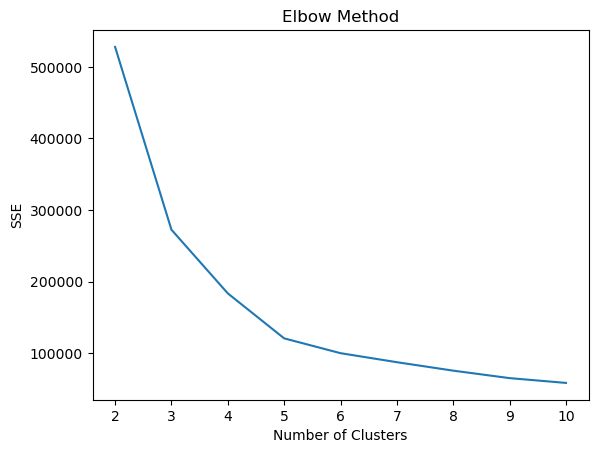

In [74]:
# Defines the number of possible clusters
range_n_clusters = range(2,11)

# Calculating SSE
sse = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_sc)
    sse.append(clusterer.inertia_)

# Calculating the elbow values
plt.plot(range_n_clusters, sse)

# Title
plt.title('Elbow Method')

# Naming x, and y axis
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

# Displays the result
plt.show()

According to the graph, the number of clusters is 3.

In [75]:
# Determine the model algorithm with the number of clusters = 3
km_model = KMeans(n_clusters=3, random_state=0)

# Train models
km_model.fit(X_sc)

# Perform customer cluster predictions
predicted_clusters = km_model.predict(X_sc)

In [76]:
# Saves cluster labels to dataset fields
df_new['cluster_km'] = predicted_clusters

In [77]:
# View dataset changes
percentage = 100 - ((df_new.shape[0]/541909)*100)
print('Initial dataset size (541909, 7)')
print('Size of final dataset {}'.format(df_new.shape))
print('Percentage change {:.2f}%'.format(percentage))

Initial dataset size (541909, 7)
Size of final dataset (465470, 9)
Percentage change 14.11%


**Tentative conclusions**:

1. Column names have been changed to *snake_case*.
2. Duplicate values have been fixed by deleting the values.
3. The missing values in the `description` column are deleted, the `customer_id` column is filled with mode values based on other columns, and the remaining missing values from the `customer_id` column are deleted.
4. The column data types for `invoice_date` and `customer_id` have also been changed to make analysis easier.
5. After checking the values of all columns, in the columns:
   - `stock_code`, some values removed as irrelevant.
   - `description`, changes the value in the column and deletes irrelevant data.
   - `quantity`, corrects the negative values contained in this column and changes them to positive.
6. The outlier in the dataset has been fixed.
7. Added several columns to facilitate analysis.

[Back to stages](#back)

## *Exploratory Data Analysis*<a id='EDA'></a>

In [78]:
# View datasets
df_new.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,date,cluster_km
500891,579098,21239,pink polkadot cup,1,2019-11-26 11:18:00,0.85,14606,2019-11-26,1
89640,544040,22261,felt egg cosy white rabbit,1,2019-02-13 11:40:00,0.85,14701,2019-02-13,1
224790,556812,20718,red retrospot shopper bag,2,2019-06-12 17:25:00,2.46,17841,2019-06-12,1
260087,559904,23112,parisienne curio cabinet,2,2019-07-11 13:20:00,7.50,13149,2019-07-11,2
182777,552684,82482,wooden picture frame white finish,1,2019-05-08 15:09:00,4.96,17841,2019-05-08,2


In [79]:
# Add revenue column
df_new ['revenue'] = df_new ['quantity'] * df_new ['unit_price']

### Store metrics<a id='3_1'></a>

#### Revenue trends

In [80]:
# Calculate the total income
daily_revenue = df_new.groupby('date').agg({
    'revenue': 'sum'
})

# View the results
daily_revenue

,revenue
date,
2018-11-29,28332.82
2018-11-30,24646.30
2018-12-01,20609.54
2018-12-03,21654.92
2018-12-04,33316.48
...,...
2019-12-03,47990.95
2019-12-04,30030.02
2019-12-05,29265.13


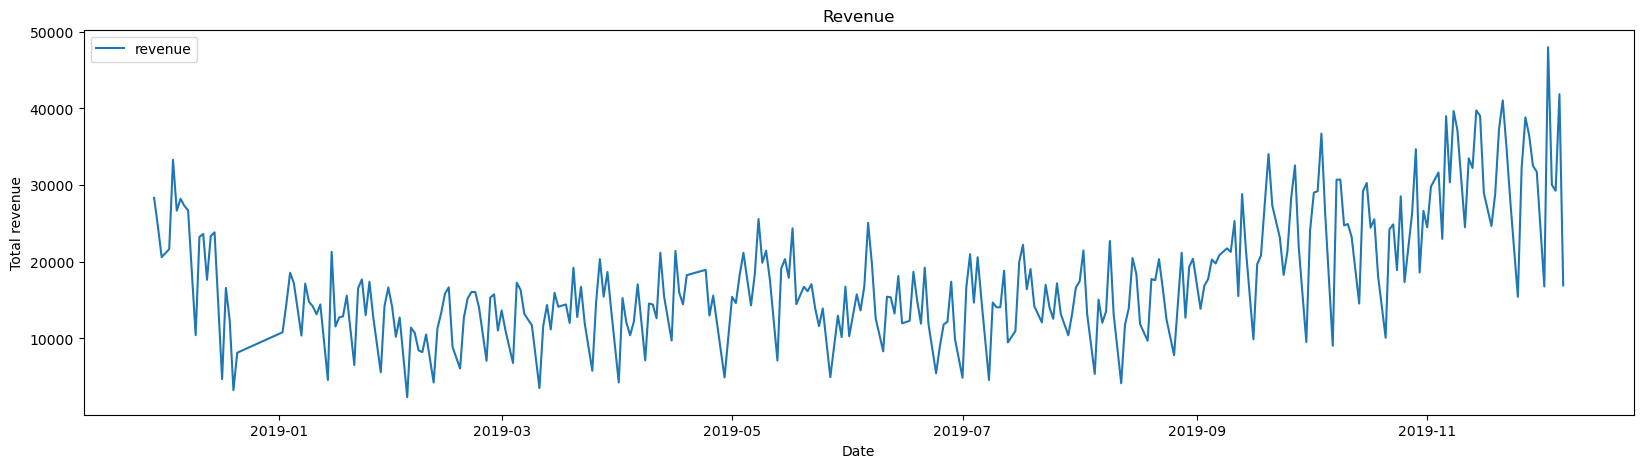

In [81]:
# Size chart
plt.figure(figsize=(20,5))

# Graph
sns.lineplot(data=daily_revenue)

# Title
plt.title('Revenue')

# Naming x, and y axis
plt.xlabel('Date')
plt.ylabel('Total revenue')

# Displays the result
plt.show()

It can be seen that the trend is increasing in daily income. This shows an increase in the number of purchases made by customers every day.

#### Average purchase size and its trend

In [82]:
# Calculates the average purchase size per day
daily_avg_order = df_new.groupby('date').agg({
    'quantity': 'mean',
})

# View the results
daily_avg_order

,quantity
date,
2018-11-29,5.127938
2018-11-30,7.267989
2018-12-01,5.060484
2018-12-03,4.564946
2018-12-04,4.319194
...,...
2019-12-03,5.359348
2019-12-04,5.936756
2019-12-05,8.242680


In [83]:
# Statistical description of the dataset
daily_avg_order.describe()

,quantity
count,305.000000
mean,6.324824
std,1.268461
min,2.955709
25%,5.383143
50%,6.265217
75%,7.176740
max,10.153631


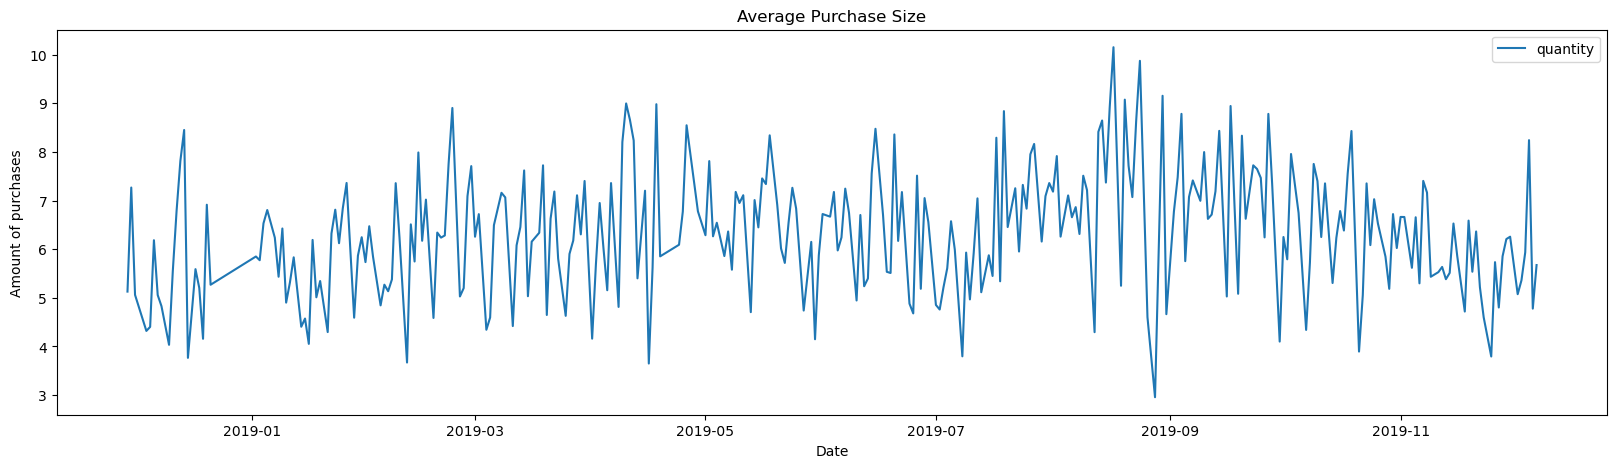

In [84]:
# Graph
daily_avg_order.plot(kind='line', figsize=(20,5))

# Title
plt.title('Average Purchase Size')

# Naming x, and y axis
plt.xlabel('Date')
plt.ylabel('Amount of purchases')

# Displays the result
plt.show()

The average purchase size over a given time period is 6.32, with a maximum purchase of 10.15 and an average purchase of 2.96. The trend from the chart shows that there has been no significant spike in purchase sizes and the trend is likely to be stable.

#### Month-to-month trend in average revenue per user

In [85]:
# Get month from date
df_new['month'] = df_new['invoice_date'].dt.to_period('M')

In [86]:
# Revenue of users
rev_per_user = df_new.groupby(['customer_id','month']).agg({
    'revenue':'sum'
})

# View the results
rev_per_user

revenue
customer_id month           
12347       2018-12   697.28
            2019-01   671.83
            2019-02    41.45
            2019-03    77.56
            2019-04   415.23
...                      ...
18283       2019-10    88.54
            2019-11   721.94
            2019-12   216.26
18287       2019-05   440.28
            2019-10   520.48

[15103 rows x 1 columns]

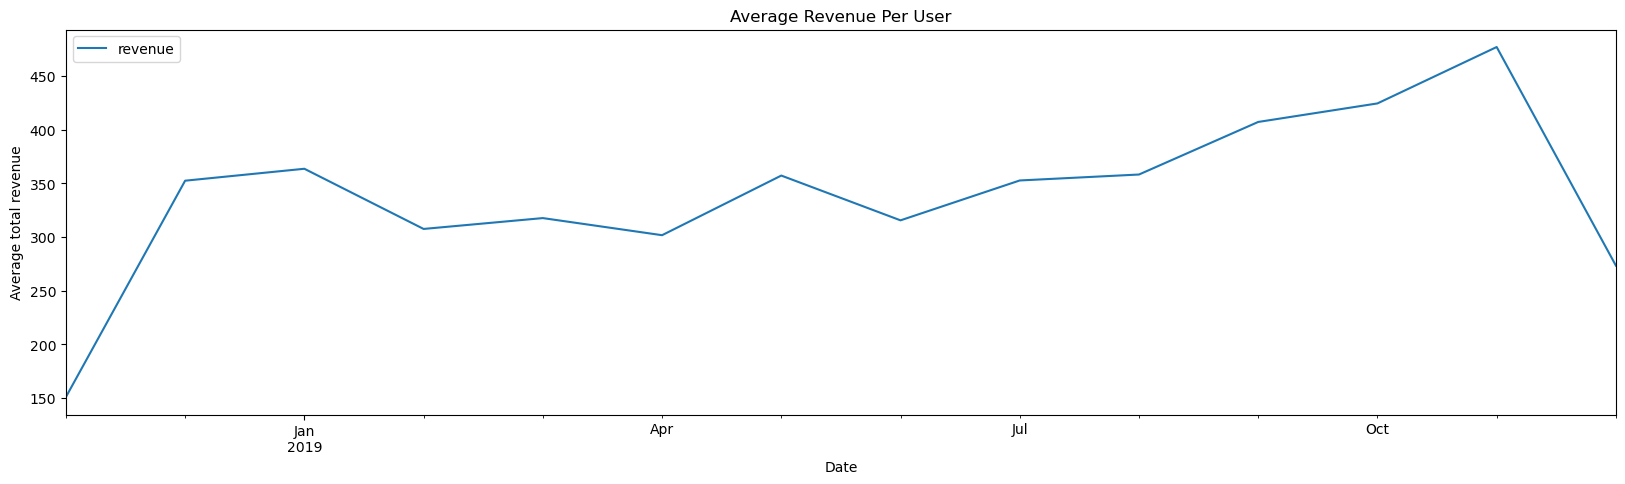

In [87]:
# Graph
rev_per_user.groupby('month').mean().plot(kind='line', figsize=(20,5))

# Title
plt.title('Average Revenue Per User')

# Naming x, y axis
plt.xlabel('Date')
plt.ylabel('Average total revenue')

# View the results
plt.show()

It can be seen that there is an increasing trend in the average revenue per user from month to month. This shows an increase in purchasing activity carried out by users every month.

**Tentative conclusions**
1. There is a positive trend in daily revenue and average revenue per user from month to month. This shows an increase in purchasing activity by customers and users.
2. Despite this, the size of purchases tends to be stable and does not show significant spikes. Therefore, it is necessary to carry out further analysis to identify what factors can influence the size of purchases and strengthen the positive trend in revenue.

[Back to stages](#back)

### User segment<a id='3_2'></a>

#### Clusters

In [88]:
# Obtain statistical average feature value per cluster
df_new.groupby(['cluster_km']).mean()

,quantity,unit_price,revenue
cluster_km,,,
0,15.149812,1.363648,19.754185
1,2.953653,1.811960,5.419509
2,2.882867,5.327696,15.118427


***Findings***:
1. Cluster 0 has the highest number of orders, the lowest unit_price value, and has the highest total value,
2. Whereas cluster 1 has the lowest number of orders, the highest unit_price value, and a lower total value than cluster 0.
3. Cluster 2 has a lower number of orders than cluster 0, a lower unit_price value than cluster 1, and has the lowest total value among all clusters.

***Insights***:
1. Cluster 0 can tend to represent customers who buy products in large quantities at lower prices and create higher revenue values,
2. Whereas cluster 1 may tend to represent customers who make purchases in small quantities but at higher prices,
3. Cluster 2 tends to represent customers who make purchases in small quantities at lower prices and create lower revenue values.

#### Cohort

In [89]:
# Function to calculate average revenue per user
'''
Definition:
-----------
    Function to calculate the average revenue per user
-----------
    data:
        desired data
'''
def avg_revenue_user (data):
    # Filter required column
    orders = data[['invoice_date', 'customer_id', 'revenue']]
    
    # View the user's first order
    first_order_date = orders.groupby('customer_id').agg({
        'invoice_date':'min'
    })

    # Rename column name
    first_order_date = first_order_date.rename(columns=({
        'invoice_date' : 'first_invoice_date'
    }))
    
    # Combine datasets
    orders = orders.join(first_order_date, on='customer_id')
    
    # Get the month of the `invoice_date` field
    orders['invoice_month'] = orders['invoice_date'].astype('datetime64[M]')

    # Gets the month of the `first_invoice_date` field
    orders['first_invoice_month'] = orders['first_invoice_date'].astype('datetime64[M]')
    
    # Revenue aggregation per user
    orders_grouped_by_cohorts = orders.groupby(['first_invoice_month', 'invoice_month']).agg({
        'revenue': 'sum',
        'customer_id': 'nunique'
    }).reset_index()
    
    # Calculates average income per user
    orders_grouped_by_cohorts['revenue_per_user'] = (
        orders_grouped_by_cohorts['revenue']
        / orders_grouped_by_cohorts['customer_id']
    )
    
    # Calculates the user lifetime
    orders_grouped_by_cohorts['cohort_lifetime'] = (
        orders_grouped_by_cohorts['invoice_month']
        - orders_grouped_by_cohorts['first_invoice_month']
    )
    
    # Convert day to month
    orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts[
        'cohort_lifetime'
    ] / np.timedelta64(1, 'M')
    
    # Round the values
    orders_grouped_by_cohorts['cohort_lifetime'] = (
        orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
    )
    
    # Leaving only the year and month of the date
    orders_grouped_by_cohorts['first_invoice_month'] = orders_grouped_by_cohorts['first_invoice_month'].dt.strftime('%Y-%m')
    
    # Pivot table of average revenue per user
    revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(
        index='first_invoice_month',
        columns='cohort_lifetime',
        values='revenue_per_user',
        aggfunc='mean',
    )
    
    # Size chart
    plt.figure(figsize=(13, 9))

    # Heatmap
    sns.heatmap(
        revenue_per_user_pivot,
        annot=True,
        fmt='.1f',
        linewidths=1,
        linecolor='gray',
    )

    # Title
    plt.title('Revenue per user')

    # Naming x,y axis
    plt.xlabel('Cohort lifetime')
    plt.ylabel('Cohort')

    return plt.show()


Klaster 0:


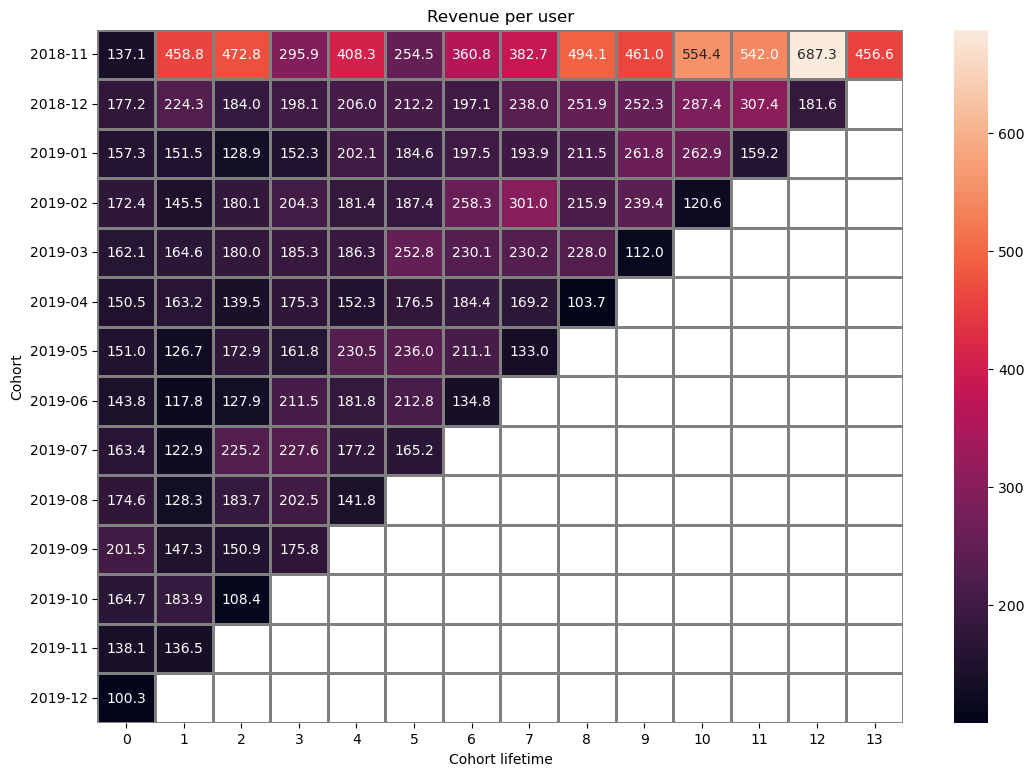


Klaster 1:


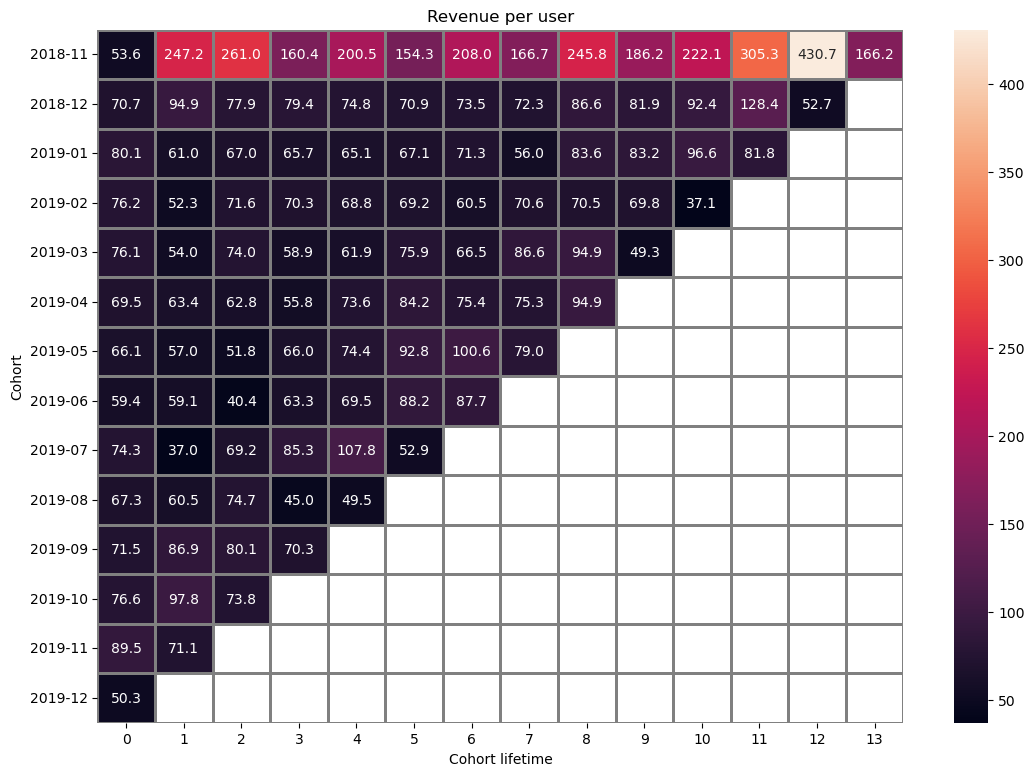


Klaster 2:


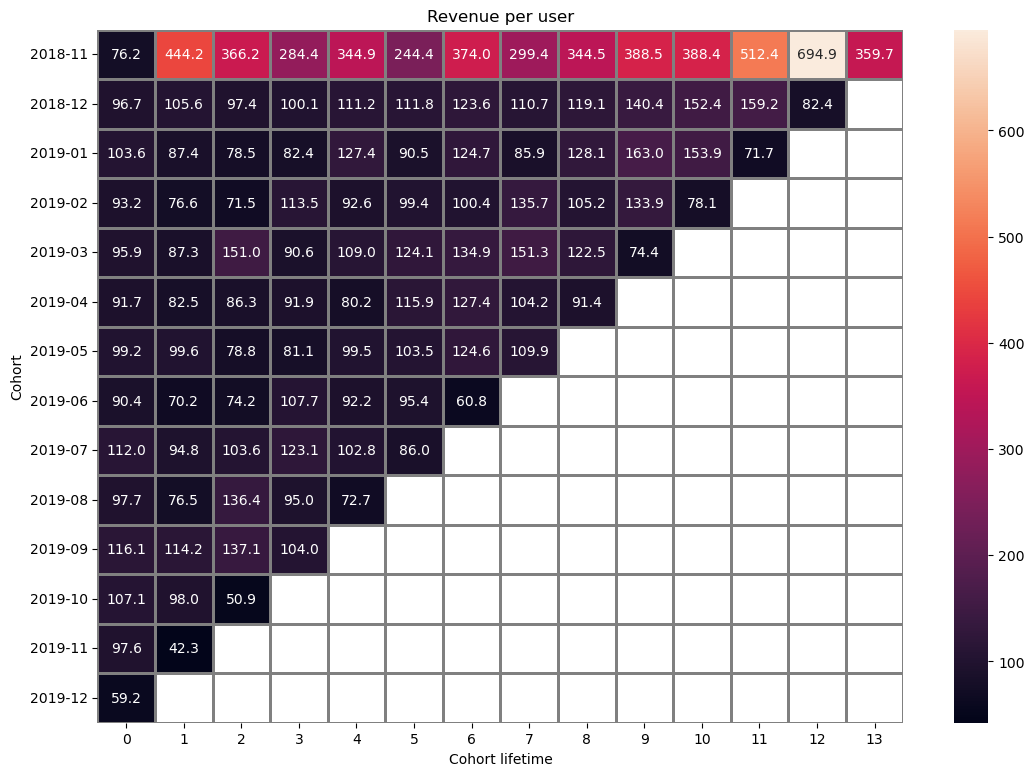

In [90]:
# Displays the average revenue per user for each cluster
for i in range(3):
    print(f"\nKlaster {i}:")
    avg_revenue_user(data=df_new[df_new['cluster_km'] == i])

If we take a look from the 2018-11 cohort in all clusters the revenue generated from users is higher than the other cohorts, this indicates a seasonal purchase period, the peak in the 12th month life cycle which indicates the possibility of repeat purchases in that period, even though the amount of income is different but all the cluster shows the maximum value in the cohort.

#### Product preference and order size

In [91]:
# Calculate the total income
product_preference = df_new.groupby(['cluster_km', 'description']).agg({
    'revenue':'sum',
    'quantity':'mean'
}).reset_index()

In [92]:
# Sort the values
product_preference = product_preference.sort_values(['cluster_km', 'revenue'], ascending=[True, False])

In [93]:
# Displays the top 10 products for each cluster
for i in range(3):
    
    # Judul
    print(f"\nCluster {i}:")
    
    # Menampilkan hasilnya
    display(product_preference[product_preference['cluster_km']==i].head(5))


Cluster 0:


,cluster_km,description,revenue,quantity
1263,0,jumbo bag red retrospot,24743.26,12.187891
1402,0,lunch bag red retrospot,16791.71,11.858793
2689,0,white hanging heart t-light holder,16419.09,13.768657
147,0,assorted colour bird ornament,15816.47,18.147059
1233,0,jam making set printed,12448.41,13.696517



Cluster 1:


,cluster_km,description,revenue,quantity
5581,1,white hanging heart t-light holder,17022.55,4.262887
4404,1,natural slate heart chalkboard,10714.70,4.670951
2982,1,assorted colour bird ornament,9248.10,7.220386
5618,1,wooden frame antique white,8756.60,4.350365
4971,1,roses regency teacup and saucer,8623.70,4.559190



Cluster 2:


,cluster_km,description,revenue,quantity
6774,2,party bunting,30568.54,4.908730
7254,2,spotty bunting,21153.90,4.383590
6138,2,doormat keep calm and come in,21126.91,4.535885
7099,2,set of 3 cake tins pantry design,17947.45,3.083263
6477,2,jam making set with jars,17923.52,3.873856


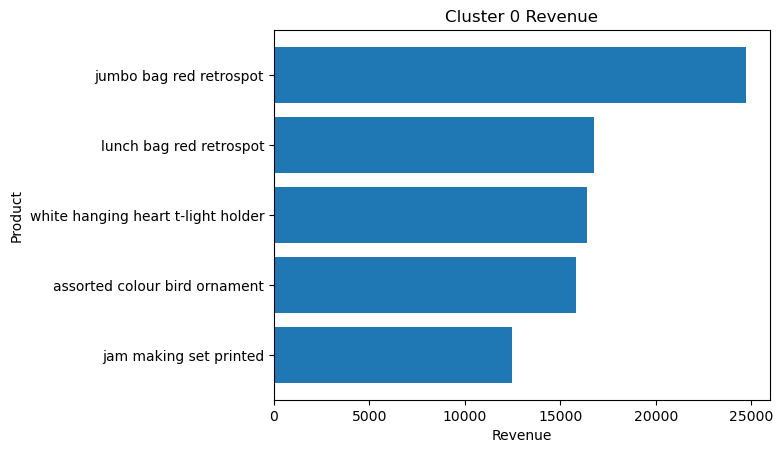

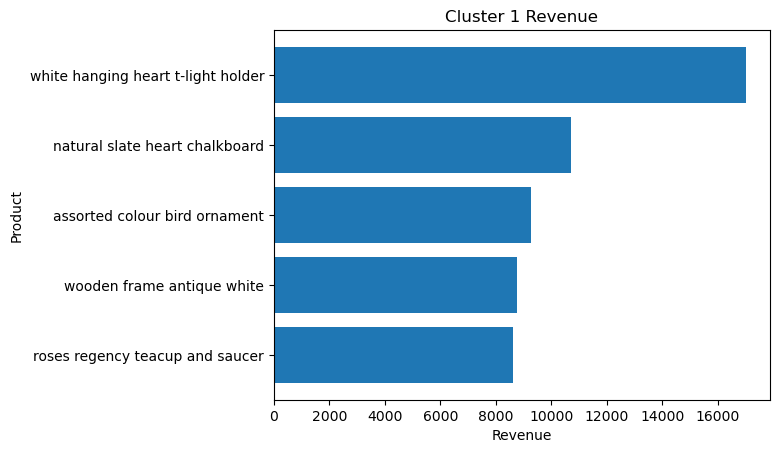

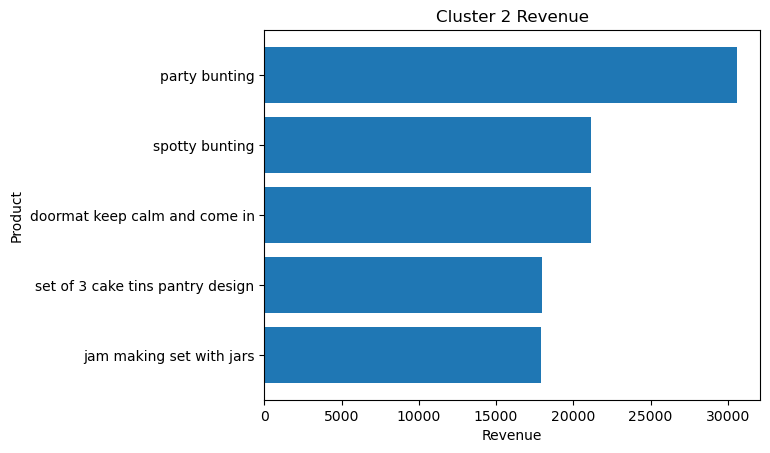

In [100]:
# Create a histogram for each cluster
for i in range(3):
    
    # Create subplots
    fig, ax = plt.subplots()
    
    # Call the function to reverse the y-axis order
    ax.invert_yaxis()
    
    # Filter datasets
    products = product_preference[product_preference['cluster_km'] == i].head(5)
    
    # Histogram
    ax.barh(products['description'], products['revenue'])
    
    # Title
    plt.title(f"Cluster {i} Revenue")
    
    # Naming x, y axis
    plt.xlabel("Revenue")
    plt.ylabel("Product")
    
    # Displays the result
    plt.show()

***Findings***:
1. Most cluster 0 revenue comes from red retrospot bags, followed by light holders, bird ornaments, and clock making sets respectively
2. While cluster 1, the highest income comes from pregnancy, followed by doormats, cake tins, and jam making sets respectively.
3. For cluster 2, the most revenue comes from light holders, chalkboards, bird ornaments, antique wooden frames, and teacups and saucers.

**Insights**:
1. Cluster 0 has a preference for products that are home decorations such as red retrospot bags, light holders, bird ornaments, and clock making sets.
2. Cluster 1 has a preference for products related to home decoration such as bunting and doormats, as well as products related to cooking utensils such as cake tins and jam making sets.
3. Cluster 2 has a preference for products related to home decoration such as light holders, chalkboards and antique wooden frames, as well as products related to drinking utensils such as teacups and saucers.

**Tentative conclusions**
1. Cluster 0 is the customer segment with the highest number of orders, the lowest unit_price value, and the highest total value. Product preferences in this segment include red retrospot jumbo bags, red retrospot lunch bags, and white hanging heart t-light holders.

2. Cluster 1 has the lowest number of orders, the highest unit_price value, and a lower total value than cluster 0. Product preferences in this segment include party bunting, spotty bunting, and doormat keep calm and come in.

3. While Cluster 2 has a lower number of orders than cluster 0, the unit_price value is lower than cluster 1, and has the lowest total value among the three segments. Product preferences in this segment include white hanging heart t-light holders, natural slate heart chalkboards, and assorted color bird ornaments.

4. In addition, the analysis also shows different order sizes in each segment. Cluster 0 has the largest number of orders, while cluster 1 has the lowest number of orders. Cluster 2 has a lower number of orders compared to cluster 0 and different product preferences from the other two segments.

5. Finally, it was found that the November 2018 cohort had the most revenue from users in all clusters, indicating a seasonal purchase period with the possibility of repeat purchases during that period.


**Recommendations**

From here, several different marketing strategies can be applied to each cluster to increase sales, for example:
1. In cluster 0, the marketing strategy can be focused on selling products in large quantities and at lower prices to increase total transactions.
2. Whereas in cluster 1, it may be more focused on selling products at higher prices but with small purchase quantities.
3. Whereas in cluster 2, the marketing strategy can be focused on products with lower prices and purchases in small quantities to attract a larger number of customers and increase total transactions.

[Back to stages](#back)

## Hypothesis Test<a id='Test'></a>

The hypothesis test this time will use a t-test where the sample is to test the difference between the two variables.

The t-test itself has a value p-value or the probability of occurrence of the value and also alpha or the error limit used.

So, if the p-value is less than alpha, then we can conclude that the evidence is strong enough to reject the null hypothesis (H0) and accept the alternative hypothesis (H1). Meanwhile, if the p-value is greater than alpha, then we fail to reject the null hypothesis (H0) and cannot draw any conclusions about the alternative hypothesis (H1).

For now the alpha used is 5%.

### Statistics difference in cluster 0 and 2 order size<a id='h1'></a>

Before starting hypothesis testing, the null hypothesis (H0) and the alternative hypothesis (H1) must be determined first.
1. H0 : The average order size of cluster 0 and cluster 2 is the same.
2. H1 : The average order size of cluster 0 and cluster 2 is not the same.

If H0 defines the average order size of cluster 0 and cluster 2 as 'same', then H1 will define the opposite of H0, namely the average order size of cluster 0 and cluster 2 is 'not the same'.

In [95]:
# Data filters
cluster_0 = df_new.loc[df_new['cluster_km'] == 0]
cluster_2 = df_new.loc[df_new['cluster_km'] == 2]

In [96]:
# Average customer order size of cluster 0
quantity_0 = cluster_0.groupby('customer_id').agg({
    'quantity':'mean'
}).reset_index()

# Average customer order size of cluster 2
quantity_2 = cluster_2.groupby('customer_id').agg({
    'quantity':'mean'
}).reset_index()

In [97]:
# Cluster 0 variance
np.var(quantity_0['quantity'])

9.154385477780664

In [98]:
# Cluster 2 variance
np.var(quantity_2['quantity'])

4.5750902456190135

In [99]:
# Alpha is set at 0.05
alpha = 0.05

# T-test
results = st.ttest_ind(quantity_0['quantity'], quantity_2['quantity'], equal_var=False)

# Displays the result
print('p-value:', results.pvalue)

# Displays results based on conditions
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot ignore the null hypothesis') 

p-value: 0.0
We reject the null hypothesis


As explained above, because the p-value is smaller than alpha, the null hypothesis is rejected, which means that statistically the average income of users of cluster 0 and cluster 2 is different.

[Back to stages](#back)

## General Conclusion<a id='Conclusion'></a>

After analyzing the data, making improvements to the dataset, adding columns to make analysis easier, after doing the analysis, several conclusions can be drawn that can be used to make special offers for customers, including:

1. There is a positive trend in daily revenue and average revenue per user from month to month. This shows an increase in purchasing activity by customers and users. Therefore, it is advisable to take advantage of this trend by creating special offers or promos to increase the number and value of transactions.

2. At the same time, it was found that the purchase size tends to be stable and does not show significant spikes. Therefore, it is advisable to carry out further analysis to identify what factors can influence the purchase size and strengthen the positive trend in earnings.

3. There is a seasonal buying period with the possibility of repeat purchases during that period. Therefore, it is advisable to make special offers or promotions during this period to increase sales.

4. It is found that there are three different customer segments with different product preferences. Therefore, it is advisable to segment customers and create special offers for each segment:
    - Cluster 0 is the customer segment with the highest number of orders and the highest total value. The marketing strategy for this segment can be focused on selling products in large quantities and at lower prices to increase total transactions.

    - Cluster 1 has the lowest number of orders and lower total value than cluster 0. The marketing strategy for this segment may be more focused on selling products at higher prices but with small purchases.

    - Cluster 2 has the lowest total value among the three segments and different product preferences from the other two segments. The marketing strategy for this segment can be focused on products with lower prices and smaller purchases to attract a larger number of customers and increase total transactions.

[Back to stages](#back)

## Presentation<a id='Presentation'></a>

Please click this link: [Presentation](https://docs.google.com/presentation/d/1P40ZJA2LNVEbooZtM42XogJ_dRFSG1aV6AJBK79_5b0/edit?usp=sharing)

## Dashboard<a id='Dashboard'></a>

Please click this link: [Dashboard](https://public.tableau.com/views/CustomerSegments_16827495401170/Dashboard1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link)

[Back to stages](#back)